In [1]:
# Importar librerías 
import pandas as pd
import numpy as np

In [2]:
# Leer el archivo csv con los datos de películas y calificaciones
df_movies = pd.read_csv("df_platforms.csv")
df_score = pd.read_csv("df_score.csv")

In [3]:
df_movies.head(2)

,type,title,director,cast,country,release_year,listed_in,description,id,platform,duration_int,duration_type,average_score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2014,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,3.47
1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2018,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110.0,min,3.55


In [4]:
df_score.dropna(inplace=True)

In [5]:
df_score.isnull().sum()

userId       0
score        0
timestamp    0
id           0
title        0
type         0
platform     0
dtype: int64

In [6]:
df_score.duplicated().sum()

0

In [5]:
df_titles= df_movies[['id','title']]

In [6]:
# Limitamos el dataset a N_filas
N_filas = 100000 

# Crear un objeto Reader con el rango de calificaciones permitido
reader = Reader(rating_scale=(1, 5))

# Utilizar el objeto Reader para leer los datos del DataFrame
data = Dataset.load_from_df(df_score[['userId', 'id', 'score']][:N_filas], reader)

In [7]:
# Dividir el conjunto de datos en subconjuntos de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25)

In [8]:
# Crear un modelo de Singular Value Decomposition
model = SVD()

# Entrenar el modelo
model.fit(trainset)

In [9]:
# Hacer predicciones de calificación para el conjunto de prueba
predictions = model.test(testset)

In [10]:
predictions[1]

Prediction(uid=882, iid='as8527', r_ui=3.0, est=4.326870905890459, details={'was_impossible': False})

In [11]:
# Hacemos una predicción al azar para usuario y película
model.predict(124380,3.5)

Prediction(uid=124380, iid=3.5, r_ui=None, est=3.527206666666667, details={'was_impossible': False})

In [12]:
# Tomaremos un usuario para hacerle una recomendación
usuario = 2044
  
# Tomamos películas a las que haya calificado con 4 o 5 estrellas
score = 4

df_user = df_score[(df_score['userId'] == usuario) & (df_score['score'] >= score)]
df_user = df_user.reset_index(drop=True)
df_user = pd.merge(df_user,df_titles, on = "id")
df_user

,userId,scored,timestamp,id,title
0,2044,5.0,1996-07-19,ns7843,rectify
1,2044,4.0,1996-07-19,as2032,jesus: his life
2,2044,5.0,1996-07-19,as5402,dons of disco
3,2044,5.0,1996-07-19,as5871,a i 1.o
4,2044,4.0,1996-07-19,as2688,"debra digiovanni: single, awkward, female"
5,2044,5.0,1996-07-19,hs1706,darwin's game
6,2044,5.0,1996-07-19,ds870,dug's special mission
7,2044,4.0,1996-07-19,ns6564,dare to be wild
8,2044,4.0,1996-07-19,as6299,supa strikas - born to play soccer
9,2044,5.0,1996-07-19,ns4081,zach galifianakis: live at the purple onion


In [13]:
# Seleccionamos las primeras 20 000 filas del dataframe e imprimimos las 5 primeras
recomendaciones_user = df_titles.iloc[:50000].copy()
print(recomendaciones_user.shape)
recomendaciones_user.head()

(22998, 2)


,id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker


In [14]:
# Debemos extraer las películas que ya ha visto
pelis_vistas = df_score[df_score['userId'] == usuario]
print(pelis_vistas.shape)
pelis_vistas.head()

(62, 4)


,userId,scored,timestamp,id
196627,2044,1.0,1996-07-19,hs2382
196628,2044,3.0,1996-07-19,as8079
196629,2044,5.0,1996-07-19,ns7843
196630,2044,4.0,1996-07-19,as2032
196631,2044,5.0,1996-07-19,as5402


In [15]:
# películas recomendadas que el usuario aún no ha visto
recomendaciones_user = recomendaciones_user[~recomendaciones_user['id'].isin(pelis_vistas)]

In [16]:
recomendaciones_user.shape

(22998, 2)

In [17]:
# Recomendamos
recomendaciones_user['Estimate_Score'] = recomendaciones_user['id'].apply(lambda x: model.predict(usuario, x).est)

In [18]:
recomendaciones_user = recomendaciones_user.sort_values('Estimate_Score', ascending=False)
print(recomendaciones_user.head(10))

           id                                      title  Estimate_Score
11296   hs179                               the simpsons        4.097193
12109   hs992                             dear comrades!        4.027596
9895    ds228  fantastic four: rise of the silver surfer        4.027190
4816   as4817                           100 days to live        3.995242
7210   as7211                       vaayai moodi pesavum        3.992519
17725  ns3535                                    the spy        3.990496
10685  ds1018                            life with mikey        3.979069
19031  ns4841                                 bad genius        3.969228
20250  ns6060                a tale of love and darkness        3.961809
12852  hs1735                                 jesus camp        3.959237


### Evaluación del modelo

In [19]:
# Imprimir el error RMSE (root mean squared error) del modelo en el conjunto de prueba
rmse = accuracy.rmse(predictions)
print(f"Error RMSE del modelo: {rmse}")

RMSE: 0.9623
Error RMSE del modelo: 0.962275212699816


### Optimización de hiperparámetros

In [34]:
rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9481  0.9540  0.9488  0.9503  0.0026  
Fit time          0.94    0.77    0.78    0.83    0.08    
Test time         0.50    0.45    0.42    0.46    0.04    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9460  0.9541  0.9510  0.9504  0.0033  
Fit time          0.79    0.82    0.81    0.81    0.02    
Test time         0.67    0.44    0.42    0.51    0.11    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9519  0.9439  0.9524  0.9494  0.0039  
Fit time          0.84    0.82    0.82    0.83    0.01    
Test time         0.44    0.61    0.63    0.56    0.09    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9541  0.9

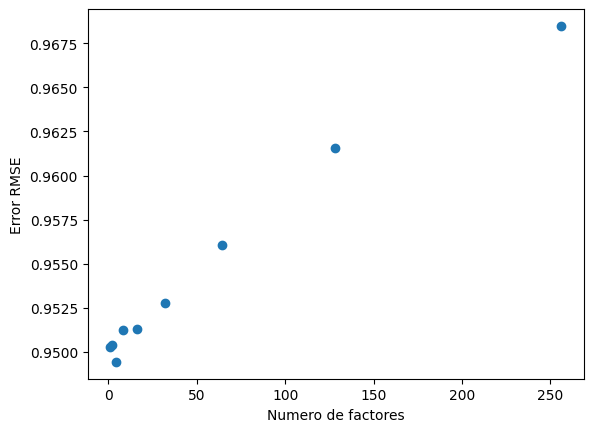

In [35]:
# Ploteamos desempeño según cantidad de factores de SVD
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [22]:
def recommend_movie(userId, id):
    # Obtener la predicción de la calificación que el usuario le daría a la película
    prediction = model.predict(userId, id)

    # Verificar si el id de la película existe en el DataFrame de películas
    if id not in df_movies['id'].unique():
        
        return 'La película con el id ingresado no existe.', None

    # Verificar si el userId del usuario existe en el DataFrame de calificaciones
    if userId not in df_score['userId'].unique():
        return 'El usuario con el id ingresado no existe.', None

    # Si la predicción es mayor o igual a 3.5, se recomienda la película
    if prediction.est >= 3.5:
        movie_title = df_movies[df_movies['id'] == id]['title'].values[0]
        return f"Se recomienda ver la película: {movie_title}" #,prediction.est.round(2)
    else:
        return f"No se recomienda ver la película con id {id}" #, prediction.est.round(2)

In [23]:
recommend_movie(2, "as113")

'No se recomienda ver la película con id as113'

In [44]:
from joblib import dump

# Guardar el modelo entrenado en un archivo utilizando Joblib
dump(model, 'modelo_streaming.joblib')

['modelo_streaming.joblib']